In [1]:
import shap
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import joblib
from sklearn.model_selection import train_test_split

model = joblib.load('RF.pkl')
transfer = joblib.load('transfer.pkl')

In [2]:
data_final=pd.read_csv("./DATA_LDH.csv")  
data=data_final.iloc[:,:-1]
target=data_final.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(data,target, test_size=0.2, random_state=2)

X_train1=transfer.transform(X_train)
X_test1=transfer.transform(X_test)

X_train1=pd.DataFrame(X_train1,columns=['ρ Mg$^{2+}$','ρ Li$^{+}$','Z','χ','Valence','Rion','Ei','Nve','M/Al','d','Li/Al'])
X_test1=pd.DataFrame(X_test1,columns=['ρ Mg$^{2+}$','ρ Li$^{+}$','Z','χ','Valence','Rion','Ei','Nve','M/Al','d','Li/Al'])

X1=pd.concat([X_train1,X_test1],axis=0) 
X=pd.concat([X_train,X_test],axis=0) 

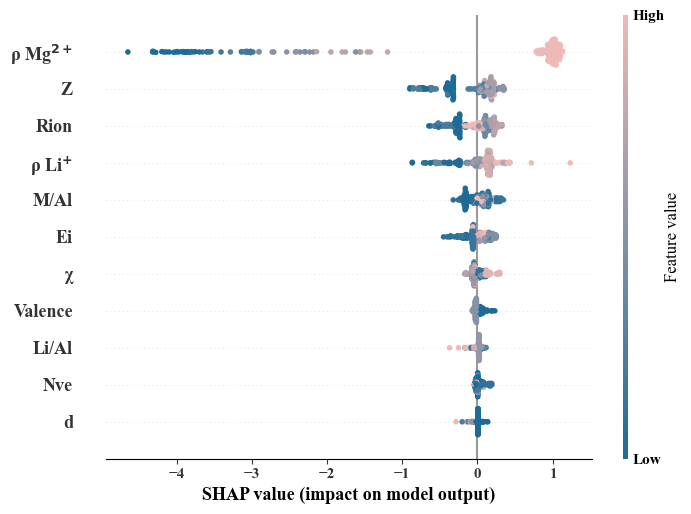

In [3]:
plt.rc('font',family='Times New Roman') 
plt.rcParams['font.weight'] = 'bold'
plt.xlabel('x', weight='bold')
plt.rcParams['font.size'] = '32'

from matplotlib.colors import LinearSegmentedColormap

newCmap = LinearSegmentedColormap.from_list("", ['#1D6B96','#EFB9B6'])


explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X1)
shap.summary_plot(shap_values, X1,cmap=newCmap,show=False)
plt.show()

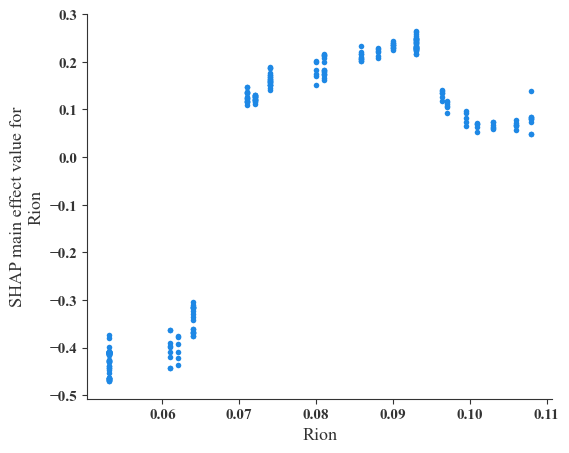

In [4]:
fig,ax = plt.subplots()
shap_interaction_values = explainer.shap_interaction_values(X1)
shap.dependence_plot(
    ('Rion', 'Rion'),
    shap_interaction_values,X,
    display_features=X,
    show=False, ax=ax
)
plt.show()

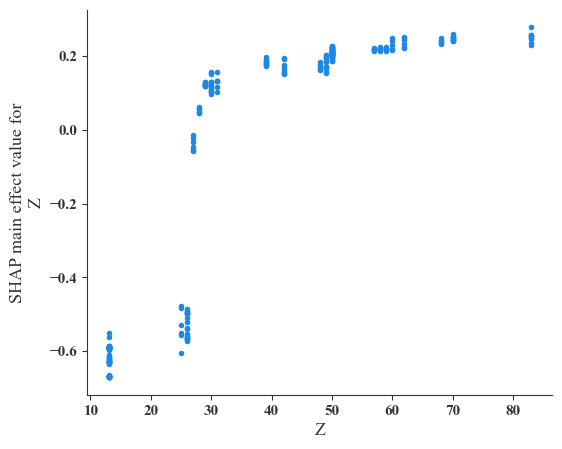

In [5]:
fig,ax = plt.subplots()
shap_interaction_values = explainer.shap_interaction_values(X1)
shap.dependence_plot(
    ('Z', 'Z'),
    shap_interaction_values,X,
    display_features=X,
    show=False, ax=ax
)
plt.show()

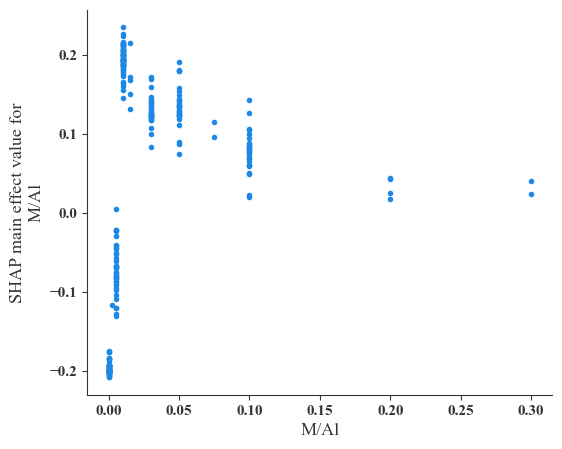

In [6]:
fig,ax = plt.subplots()
shap_interaction_values = explainer.shap_interaction_values(X1)
shap.dependence_plot(
    ('M/Al', 'M/Al'),
    shap_interaction_values,X,
    display_features=X,
    show=False, ax=ax
)
plt.show()

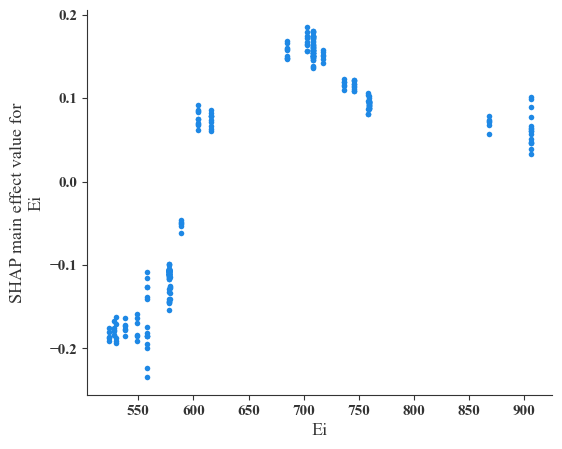

In [7]:
fig,ax = plt.subplots()
shap_interaction_values = explainer.shap_interaction_values(X1)
shap.dependence_plot(
    ('Ei', 'Ei'),
    shap_interaction_values,X,
    display_features=X,
    show=False, ax=ax
)
plt.show()

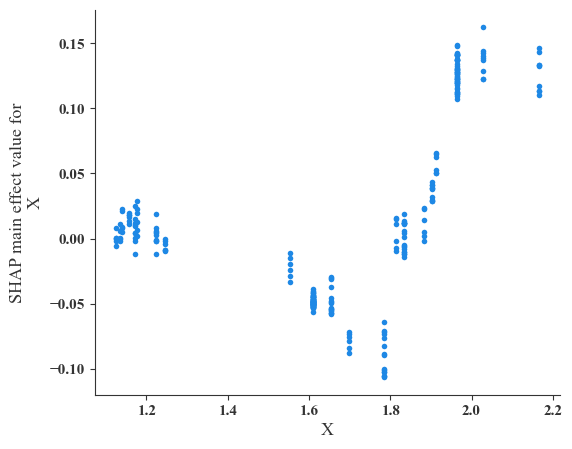

In [8]:
fig,ax = plt.subplots()
shap_interaction_values = explainer.shap_interaction_values(X1)
shap.dependence_plot(
    ('X', 'X'),
    shap_interaction_values,X,
    display_features=X,
    show=False, ax=ax
)
plt.show()